# Exploratve Data Analysis

This notebook includes an explorative data analysis  of the data sets for the following Common Vulnerabilities and Exposures *CVE's*:
 - CVE-2012-2122
 - CVE-2014-0160 
 - CVE-2017-12635-6
 - CVE-2018-3760
 - CVE-2019-5418
 - CVE-2020-9484
 - CVE-2020-13942
 - CVE-2020-23839

For further information on each *CVE* and how the data sets were gathered please refer to https://github.com/LID-DS/LID-DS/wiki/Scenarios

The main goal is to be able to record CVE-2020-18392 and detect DoS via CPU- and Memory-Usage https://cwe.mitre.org/data/definitions/674.html

In [151]:
# Imports
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [68]:
# load all the data
TRAIN = {}
TEST = {}
VALIDATION = {}

path = "../../data/interim/raw"
train = "train_"
test = "test_"
validation = "validation_"
#  list of scenarios
scenarios = [
        'CVE-2012-2122',
        'CVE-2014-0160',
        'CVE-2017-7529',
        'CVE-2017-12635_6',
        'CVE-2018-3760',
        'CVE-2019-5418',
        'CVE-2020-9484',
        'CVE-2020-13942',
        'CVE-2020-23839'
]

for i in range(0,len(scenarios)):
    TRAIN[scenarios[i]]= pd.read_pickle(path + "/" + train + scenarios[i] + ".pkl")
    TEST[scenarios[i]] = pd.read_pickle(path + "/" + test + scenarios[i] + ".pkl")
    VALIDATION[scenarios[i]] = pd.read_pickle(path + "/" + validation + scenarios[i] + ".pkl")
            

In [69]:
# create empyt list do concenate everything at the end
dfs_train = []
# create a column for each scenario name
for key in TRAIN.keys():
    TRAIN[key]['scenario'] = key
    temp_df = TRAIN[key]
    dfs_train.append(temp_df)
TRAIN['ALL'] = pd.concat(dfs_train)

dfs_test = []
for key in TEST.keys():
    TEST[key]['scenario'] = key
    temp_df = TEST[key]
    dfs_test.append(temp_df)
TEST['ALL'] = pd.concat(dfs_test)

dfs_validation = []
for key in VALIDATION.keys():
    VALIDATION[key]['scenario'] = key
    temp_df = VALIDATION[key]
    dfs_validation.append(temp_df)
VALIDATION['ALL'] = pd.concat(dfs_validation)


For all data scenarios we will focus on the features *cpu_usage* and *memory_usage*.

In [70]:
train = TRAIN['ALL']
train.head()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written,exploit,timestamp_container_ready,timestamp_trick_admin,timestamp_execute_reverse_shell,timestamp_warmup_end,container_name,dates,times,scenario
timestamp,,,,,,,,,,,,,,,
2021-09-14 00:55:36.149,0.002020,84160512,0,0,0,0,False,2021-09-14 00:55:33.138913,0,0,2021-09-14 00:55:36.142109,acidic_kilby_9548,2021-09-14,00:55:36.149000,CVE-2012-2122
2021-09-14 00:55:37.153,0.092346,85045248,5605,4919,0,16384,False,2021-09-14 00:55:33.138913,0,0,2021-09-14 00:55:36.142109,acidic_kilby_9548,2021-09-14,00:55:37.153000,CVE-2012-2122
2021-09-14 00:55:38.156,0.079045,86081536,4731,4031,0,28672,False,2021-09-14 00:55:33.138913,0,0,2021-09-14 00:55:36.142109,acidic_kilby_9548,2021-09-14,00:55:38.156000,CVE-2012-2122
2021-09-14 00:55:39.159,0.057994,86700032,3495,3087,0,20480,False,2021-09-14 00:55:33.138913,0,0,2021-09-14 00:55:36.142109,acidic_kilby_9548,2021-09-14,00:55:39.159000,CVE-2012-2122
2021-09-14 00:55:40.162,0.066642,87162880,3025,2642,0,40960,False,2021-09-14 00:55:33.138913,0,0,2021-09-14 00:55:36.142109,acidic_kilby_9548,2021-09-14,00:55:40.162000,CVE-2012-2122


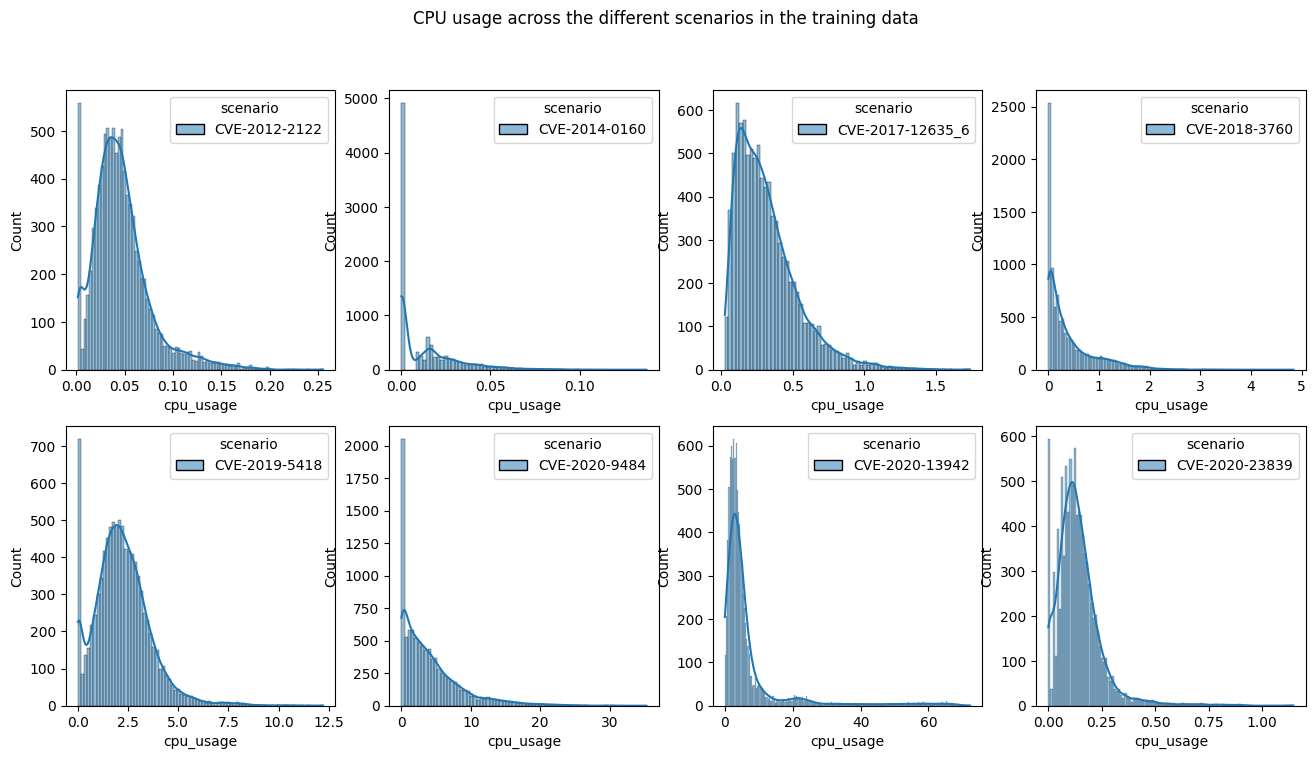

In [177]:
# CPU Usage
fig, axes  = plt.subplots(2,4, sharex=False, figsize=(16,8))
sns.histplot(data=train[train['scenario']=='CVE-2012-2122'], x='cpu_usage', kde=True, hue='scenario', ax=axes[0,0])
sns.histplot(data=train[train['scenario']=='CVE-2014-0160'], x='cpu_usage', kde=True, hue='scenario',ax=axes[0,1])
sns.histplot(data=train[train['scenario']=='CVE-2017-12635_6'], x='cpu_usage', kde=True, hue='scenario',ax=axes[0,2])
sns.histplot(data=train[train['scenario']=='CVE-2018-3760'], x='cpu_usage', kde=True, hue='scenario',ax=axes[0,3])
sns.histplot(data=train[train['scenario']=='CVE-2019-5418'], x='cpu_usage', kde=True, hue='scenario',ax=axes[1,0])
sns.histplot(data=train[train['scenario']=='CVE-2020-9484'], x='cpu_usage', kde=True, hue='scenario',ax=axes[1,1])
sns.histplot(data=train[train['scenario']=='CVE-2020-13942'], x='cpu_usage', kde=True, hue='scenario',ax=axes[1,2])
sns.histplot(data=train[train['scenario']=='CVE-2020-23839'], x='cpu_usage', kde=True, hue='scenario',ax=axes[1,3])
fig.suptitle("CPU usage across the different scenarios in the training data")
plt.show()
fig.savefig("../../src/plots/Histplots_cpu_usage_sceanrios_train.png")


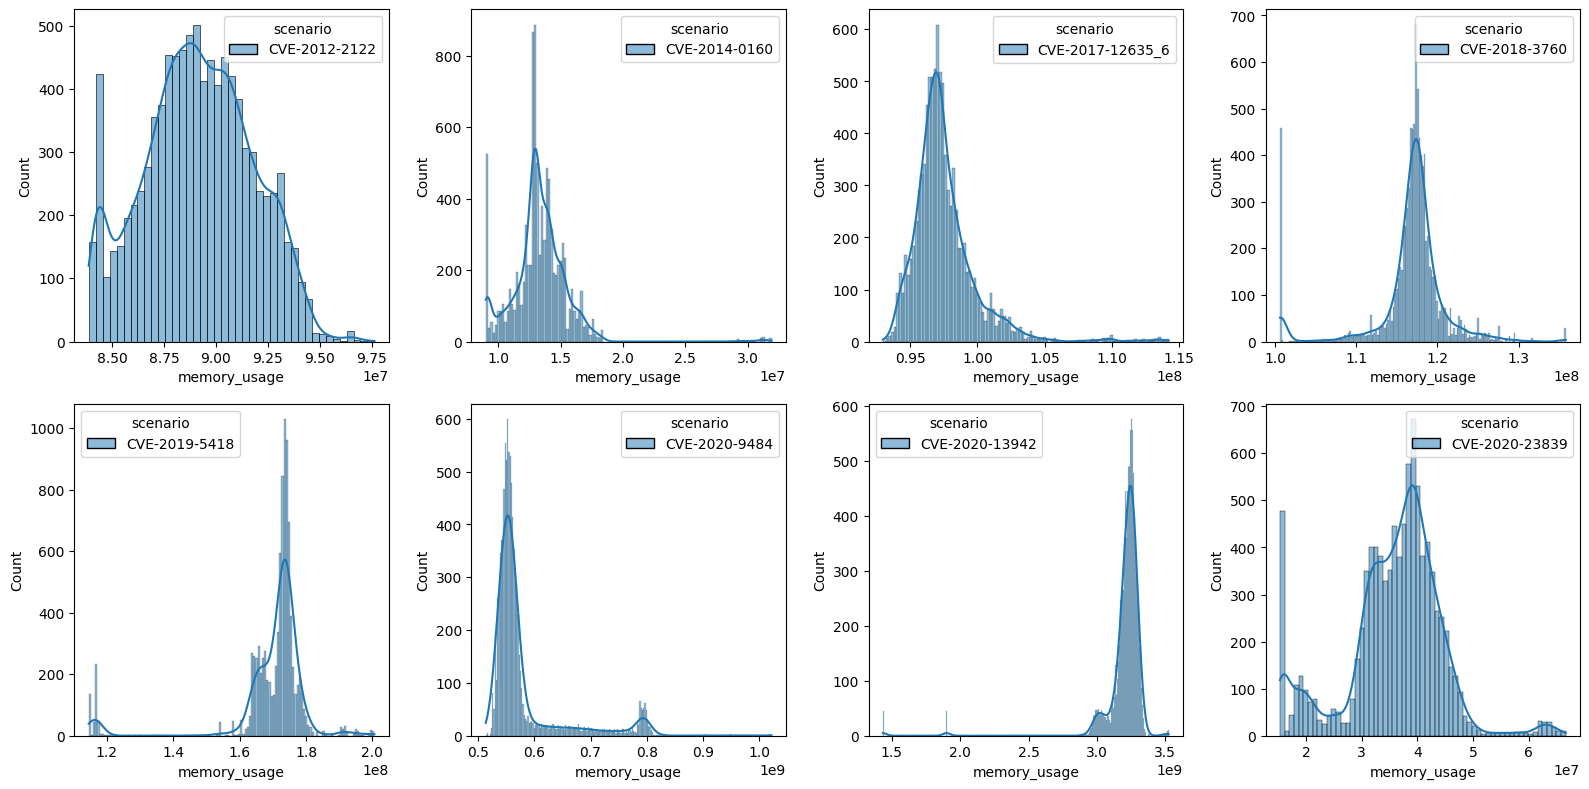

In [188]:
# Memory Usage 
fig, axes  = plt.subplots(2,4, sharex=False, figsize=(16,8))
sns.histplot(data=train[train['scenario']=='CVE-2012-2122'], x='memory_usage', kde=True, hue='scenario', ax=axes[0,0])
sns.histplot(data=train[train['scenario']=='CVE-2014-0160'], x='memory_usage', kde=True, hue='scenario',ax=axes[0,1])
sns.histplot(data=train[train['scenario']=='CVE-2017-12635_6'], x='memory_usage', kde=True, hue='scenario',ax=axes[0,2])
sns.histplot(data=train[train['scenario']=='CVE-2018-3760'], x='memory_usage', kde=True, hue='scenario',ax=axes[0,3])
sns.histplot(data=train[train['scenario']=='CVE-2019-5418'], x='memory_usage', kde=True, hue='scenario',ax=axes[1,0])
sns.histplot(data=train[train['scenario']=='CVE-2020-9484'], x='memory_usage', kde=True, hue='scenario',ax=axes[1,1])
sns.histplot(data=train[train['scenario']=='CVE-2020-13942'], x='memory_usage', kde=True, hue='scenario',ax=axes[1,2])
sns.histplot(data=train[train['scenario']=='CVE-2020-23839'], x='memory_usage', kde=True, hue='scenario',ax=axes[1,3])
fig.tight_layout()
plt.show()
fig.savefig("../../src/plots/Histplots_memory_usage_sceanrios_train.png")

In [173]:
test = TEST['ALL']
test.head()

,cpu_usage,memory_usage,network_received,network_send,storage_read,storage_written,exploit,timestamp_container_ready,timestamp_warmup_end,container_name,dates,times,scenario
timestamp,,,,,,,,,,,,,
2021-09-13 16:11:26.915,0.043767,84586496,2495,2133,0,16384,False,2021-09-13 16:11:23.648256,2021-09-13 16:11:26.651452,abundant_driscoll_5366,2021-09-13,16:11:26.915000,CVE-2012-2122
2021-09-13 16:11:27.920,0.029553,84815872,1621,1141,0,8192,False,2021-09-13 16:11:23.648256,2021-09-13 16:11:26.651452,abundant_driscoll_5366,2021-09-13,16:11:27.920000,CVE-2012-2122
2021-09-13 16:11:28.925,0.008983,84832256,405,231,0,4096,False,2021-09-13 16:11:23.648256,2021-09-13 16:11:26.651452,abundant_driscoll_5366,2021-09-13,16:11:28.925000,CVE-2012-2122
2021-09-13 16:11:29.931,0.025969,85037056,1433,1293,0,16384,False,2021-09-13 16:11:23.648256,2021-09-13 16:11:26.651452,abundant_driscoll_5366,2021-09-13,16:11:29.931000,CVE-2012-2122
2021-09-13 16:11:30.936,0.053534,85245952,2328,1988,0,45056,False,2021-09-13 16:11:23.648256,2021-09-13 16:11:26.651452,abundant_driscoll_5366,2021-09-13,16:11:30.936000,CVE-2012-2122


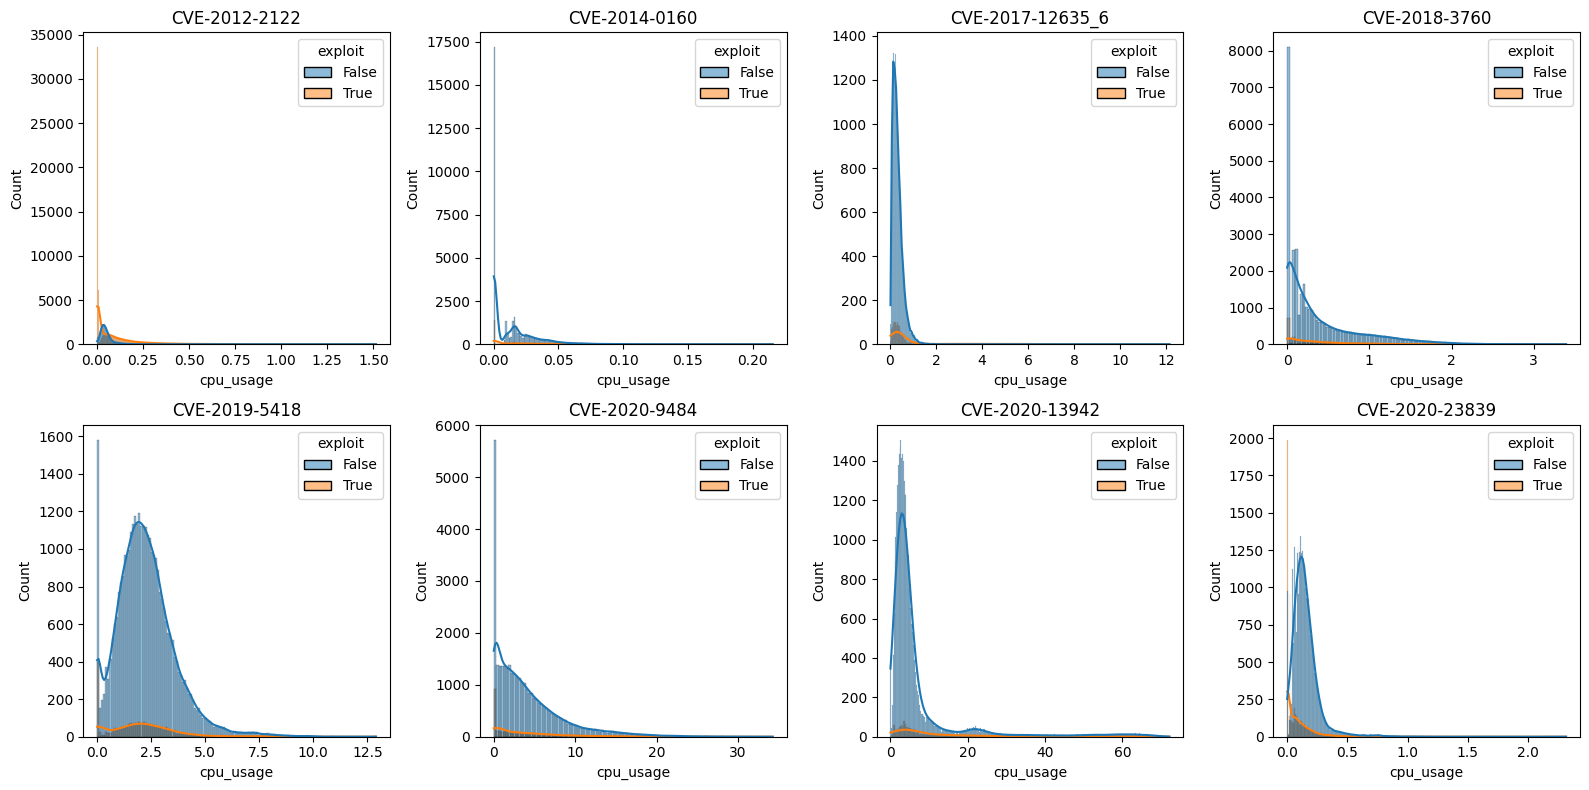

In [191]:
# CPU Usage
fig, axes  = plt.subplots(2,4, sharex=False, figsize=(16,8))
sns.histplot(data=test[test['scenario']=='CVE-2012-2122'], x='cpu_usage', kde=True, hue='exploit', ax=axes[0,0])
axes[0,0].title.set_text('CVE-2012-2122')

sns.histplot(data=test[test['scenario']=='CVE-2014-0160'], x='cpu_usage', kde=True, hue='exploit',ax=axes[0,1])
axes[0,1].title.set_text('CVE-2014-0160')

sns.histplot(data=test[test['scenario']=='CVE-2017-12635_6'], x='cpu_usage', kde=True, hue='exploit',ax=axes[0,2])
axes[0,2].title.set_text('CVE-2017-12635_6')

sns.histplot(data=test[test['scenario']=='CVE-2018-3760'], x='cpu_usage', kde=True, hue='exploit',ax=axes[0,3])
axes[0,3].title.set_text('CVE-2018-3760')

sns.histplot(data=test[test['scenario']=='CVE-2019-5418'], x='cpu_usage', kde=True, hue='exploit',ax=axes[1,0])
axes[1,0].title.set_text('CVE-2019-5418')

sns.histplot(data=test[test['scenario']=='CVE-2020-9484'], x='cpu_usage', kde=True, hue='exploit',ax=axes[1,1])
axes[1,1].title.set_text('CVE-2020-9484')

sns.histplot(data=test[test['scenario']=='CVE-2020-13942'], x='cpu_usage', kde=True, hue='exploit',ax=axes[1,2])
axes[1,2].title.set_text('CVE-2020-13942')

sns.histplot(data=test[test['scenario']=='CVE-2020-23839'], x='cpu_usage', kde=True, hue='exploit',ax=axes[1,3])
axes[1,3].title.set_text('CVE-2020-23839')
fig.tight_layout()
plt.show()
fig.savefig("../../src/plots/Histplots_cpu_usage_sceanrios_test.png")

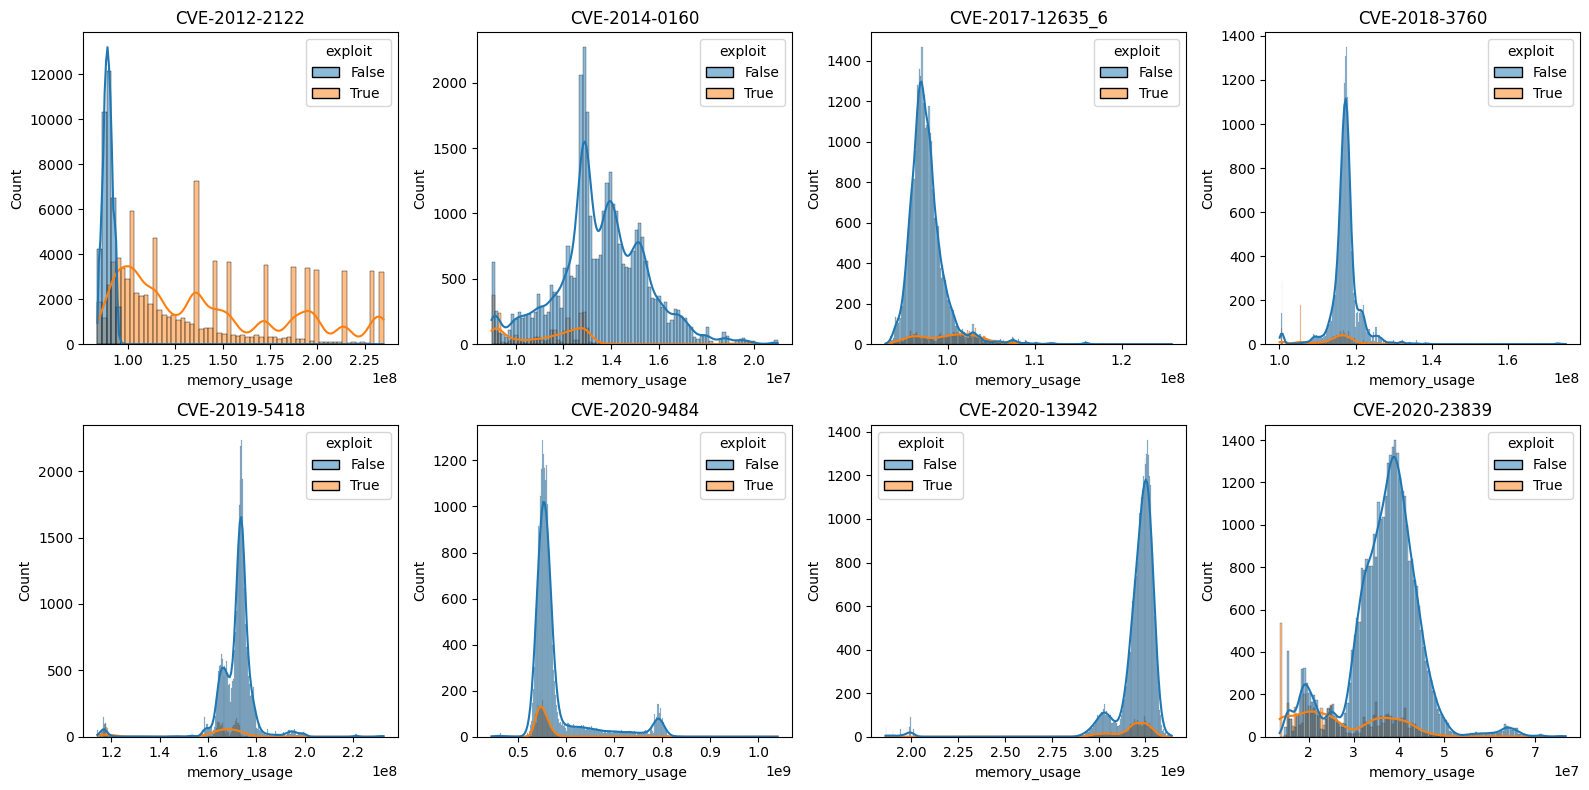

In [192]:
# Memory Usage 
fig, axes  = plt.subplots(2,4, sharex=False, figsize=(16,8))
sns.histplot(data=test[test['scenario']=='CVE-2012-2122'], x='memory_usage', kde=True, hue='exploit', ax=axes[0,0])
axes[0,0].title.set_text('CVE-2012-2122')

sns.histplot(data=test[test['scenario']=='CVE-2014-0160'], x='memory_usage', kde=True, hue='exploit',ax=axes[0,1])
axes[0,1].title.set_text('CVE-2014-0160')

sns.histplot(data=test[test['scenario']=='CVE-2017-12635_6'], x='memory_usage', kde=True, hue='exploit',ax=axes[0,2])
axes[0,2].title.set_text('CVE-2017-12635_6')

sns.histplot(data=test[test['scenario']=='CVE-2018-3760'], x='memory_usage', kde=True, hue='exploit',ax=axes[0,3])
axes[0,3].title.set_text('CVE-2018-3760')

sns.histplot(data=test[test['scenario']=='CVE-2019-5418'], x='memory_usage', kde=True, hue='exploit',ax=axes[1,0])
axes[1,0].title.set_text('CVE-2019-5418')

sns.histplot(data=test[test['scenario']=='CVE-2020-9484'], x='memory_usage', kde=True, hue='exploit',ax=axes[1,1])
axes[1,1].title.set_text('CVE-2020-9484')

sns.histplot(data=test[test['scenario']=='CVE-2020-13942'], x='memory_usage', kde=True, hue='exploit',ax=axes[1,2])
axes[1,2].title.set_text('CVE-2020-13942')

sns.histplot(data=test[test['scenario']=='CVE-2020-23839'], x='memory_usage', kde=True, hue='exploit',ax=axes[1,3])
axes[1,3].title.set_text('CVE-2020-23839')
fig.tight_layout()
plt.show()
fig.savefig("../../src/plots/Histplots_memory_usage_sceanrios_test.png")